# Кластеризация и метрики

### 1. Коэффициент Силуэтта
Обучим *k-means* для количества кластеров $k=4$ на датасете `clustering.pkl`. Выясним как изменилась метрика силуэтта, какое количество кластеров лучше, два или четыре.

In [1]:
# библиотеки
from sklearn.cluster import KMeans
import pickle
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import euclidean_distances
%matplotlib inline

In [2]:
# загружаем датасет
with open('clustering.pkl', 'rb') as f:
    data = pickle.load(f)

X = data['X']
Y = data['Y']

In [3]:
# обучаем модель на 4 кластерах
kmean_model = KMeans(n_clusters=4).fit(X)
# метрика силуэтта
score = silhouette_score(X, kmean_model.labels_)
print('Метрика силуэтта при KMeans(k=4): %.4f' % score)

Метрика силуэтта при KMeans(k=4): 0.4416


In [4]:
# обучаем модель на 2 кластерах
kmean_model = KMeans(n_clusters=2).fit(X)
# метрика силуэтта
score = silhouette_score(X, kmean_model.labels_)
print('Метрика силуэтта при KMeans(k=2): %.4f' % score)

Метрика силуэтта при KMeans(k=2): 0.4465


<br>
<br>
Метрика силуэтта ухудшилась при колличестве 4 класстеров в k-means. Лучше 2 класстера чем 4.
<br>
<br>
<br>
<br>





### 2. Adjusted Mutual Information

Обучаем *k-means* для количества кластеров $k=4$ на датасете `clustering.pkl`. Выясняем как изменилась метрика *AMI*, какое количество кластеров лучше.

In [6]:
# обучаем модель на 4 кластерах
kmean_model = KMeans(n_clusters=4).fit(X)
# метрика AMI
score = adjusted_mutual_info_score(Y, kmean_model.labels_, average_method='arithmetic')

print("Качество кластеризации по метрике AMI при KMeans(k=4): %.3f" % score)

Качество кластеризации по метрике AMI при KMeans(k=4): 0.583


<br>
Метрика AMI ухудшилась при колличестве 4 класстеров в k-means.<br>
Лучшее кол-во класстеров по метрике AMI -> 2
<br>
<br>
<br>
<br>




### 3.
1. Загрузим датасет `clustering_hw.csv`
1. Вычислим оптимальное количество кластеров $k$
1. Обучим k-means с количеством кластеров  $k$
1. Определим к какому кластеру принадлежат точки $x=(5, 8)$ и $x=(0, 5)$
1. Каково качество кластеризации по AMI

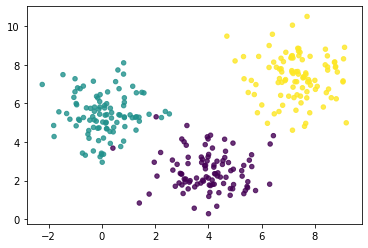

In [11]:
# выгружаем DF
df = pd.read_csv('clustering_hw.csv')

# готовим X и Y
X = df[['x1', 'x2']]
Y = df['y']

# выводим график
plt.scatter(X.x1, X.x2, s=20, alpha=0.8, c=Y)
plt.show()

In [12]:
# вычисляем оптимальное количество кластеров k
metrics = []
MAX_CLUSTERS = 7
for cluster_num in range(1, MAX_CLUSTERS):
    # обучаем модель
    kmeans_model = KMeans(n_clusters=cluster_num, random_state=99).fit(X)
    # вытаскиваем центройды и лэйблы
    centroids, labels = kmeans_model.cluster_centers_, kmeans_model.labels_
    # назначаем начальную метрику
    metric = 0
    # вычисляем метрику
    for centroid_label in range(cluster_num):
        metric += euclidean_distances(
            X[labels==centroid_label],
            centroids[centroid_label,:].reshape(1,-1)
        ).sum(axis=0)[0]
    print("cluster_num %s, metric %s" % (cluster_num, metric))
    # добавляем в переменную
    metrics.append(metric)

cluster_num 1, metric 1105.8973781101085
cluster_num 2, metric 663.5712032768099
cluster_num 3, metric 374.65897141840577
cluster_num 4, metric 348.17052724059556
cluster_num 5, metric 324.079849510412
cluster_num 6, metric 303.58991742656247


best cluster num: 3


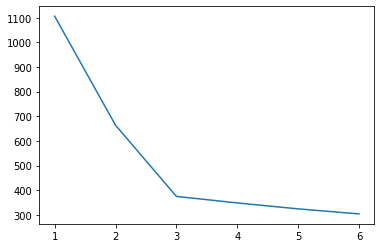

In [13]:
# выводим график для визуализации лучшего кластера
D = []
for i in range(0, len(metrics)-1):
    d = abs(metrics[i+1]-metrics[i])/abs(metrics[i]-metrics[i-1])
    D.append(d)
best_cluster = np.argmin(D)+1
print("best cluster num: %s" % (best_cluster))

plt.plot([i+1 for i in range(len(metrics))], metrics)
plt.show()

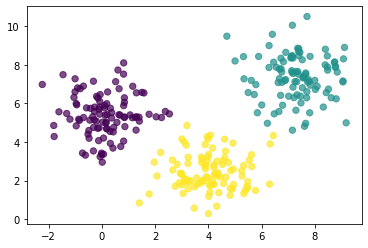

In [14]:
# обучаем модель на лучшем класстере
kmeans_model = KMeans(n_clusters=best_cluster, random_state=42).fit(X)

# выводим результат на графике
plt.scatter(X.x1, X.x2, s=40, c=kmeans_model.labels_, alpha=0.7)
plt.show()

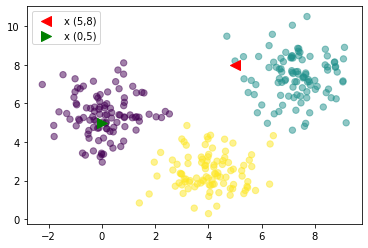

In [15]:
# проверяем к каким кластерам относитятся точки
x_1 = [5, 8]
x_2 = [0, 5]

a = plt.scatter(X.x1, X.x2, s=40, c=kmeans_model.labels_, alpha=0.5)
b = plt.scatter(x_1[0], x_1[1], s=100, c='r', marker='<')
c = plt.scatter(x_2[0], x_2[1], s=100, c='g', marker='>')
plt.legend((b, c), ('x (5,8)', 'x (0,5)'))
plt.show()

<br>
<br>
Кластеры х(5,8) и х(0,5) относятся к разным кластерам.
<br>
<br>
<br>
<br>



In [22]:
# метрика AMI
score = adjusted_mutual_info_score(Y, kmeans_model.labels_, average_method='arithmetic')

print("Качество кластеризации по метрике AMI при KMeans(k=%.f): %.3f" % (best_cluster, score))

Качество кластеризации по метрике AMI при KMeans(k=3): 0.970


### Заключение


* Silhouette: используем, когда есть только сами объекты, а метки кластеров отсутствуют в обучающей выборке
* AMI: используем, когда известны "истинные" метки кластеров
